<a href="https://colab.research.google.com/github/kbangali/ml/blob/master/MLND_Webinar_3_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions we will address in today's Webinar


1.   How to get your bearings with any dataset?  First steps...
2.   A word about samples and distributions.  Compare the training and test sets as well as what you are expecting during inference...
2.   Get started with simple models quickly and measure performance. We will see how to do quick comparisons...
3.   There is no free lunch... Simple models tend to have high bias (don't have good performance on the training set) and complex models tend to have high variance (don't have good performance on the test set - don't generalize)

This is the Bias and Variance tradeoff and we can see where we are in this tradeoff using the learning and complexity graphs that we will explore in this notebook...






In [0]:
# Colab convinently has housing data from CA loaded each time the environment comes up.
! ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


# California Housing Data from the 1990 US Census
![California Features](https://drive.google.com/uc?id=1Voq-pwRV7I3oMepTUB2DN268w8A_QOPO)


In [0]:
# the base libraries needed for analysis and data exloration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Difference Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# used in cross validation to evaluate the bias / variance tradeoff for a given model configuration and training set
from sklearn.model_selection import learning_curve

# used in cross validation to evaluate a group of hyperparameters for a given model and training set
from sklearn.model_selection import validation_curve

# 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
df_train=pd.read_csv("./sample_data/california_housing_train.csv")
df_test=pd.read_csv("./sample_data/california_housing_test.csv")
print("{} training records and {} test records".format(len(df_train),len(df_test)))

17000 training records and 3000 test records


In [0]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Do these things "everytime" you are digesting a new dataset...



1.   Descriptive statistics - look for outliers  - Make Sense?
2.   Look at data types of the features, and info on whether there is missing data.  If there is...you should pick a strategy to deal with it...
3.   Perform correlations looking for relationships between independent variables and the independent variables and the target.
4.   Look at the correlations visually using scatter matricies



In [0]:
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [0]:
df_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


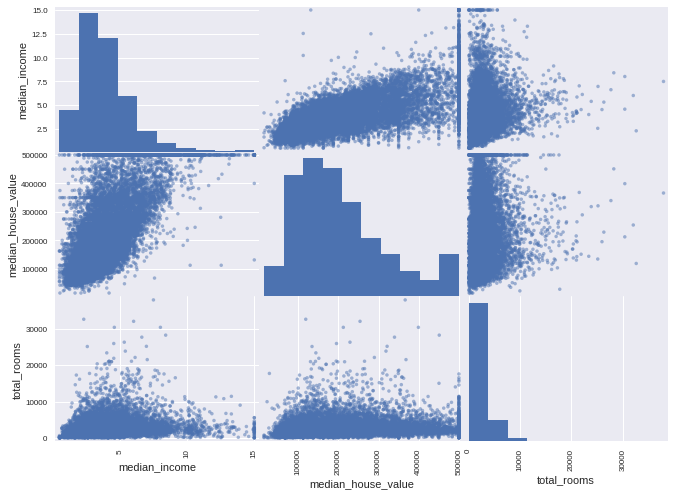

In [0]:
pd.plotting.scatter_matrix(df_train[['median_income','median_house_value','total_rooms']], figsize=(11,8))
plt.show()

## One more thing before we go to modeling ... check the training and test distributions... are they similar?

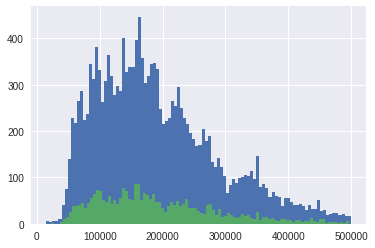

In [0]:
df_train[df_train.median_house_value<500000]['median_house_value'].hist(bins=100)
df_test[df_test.median_house_value<500000]['median_house_value'].hist(bins=100)
plt.show()

## Create the training set - separate the independent variables and the target variable


In [0]:
X,y = df_train[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']],df_train['median_house_value']

In [0]:
"""Taken from the SKLEARN DOCS
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
"""

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

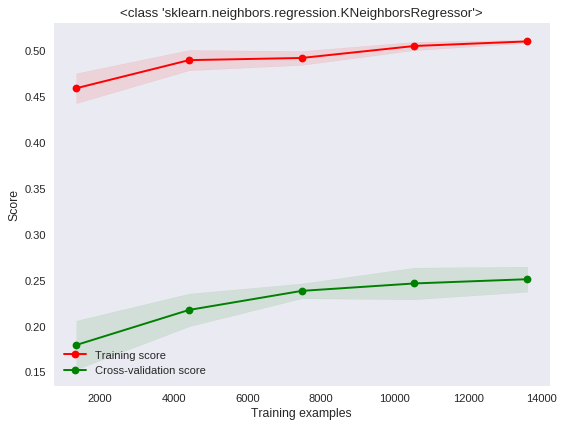

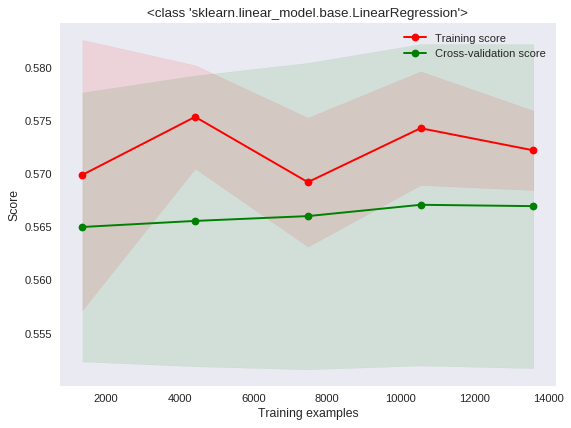

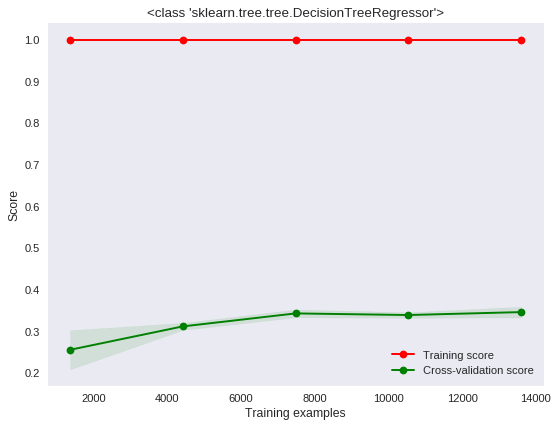

In [0]:
# Quickly take the default parameters for a group of potential regressors
estimators = [KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor()]

# Iterate through the estimators to see how the default parameters do on training and validation
for e in estimators:
  title = str(type(e))
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  plot_learning_curve(e, title, X, y, cv=cv, n_jobs=4)
  plt.show()

In [0]:
param_range=[x for x in range(2,16,2)]
train_scores, test_scores = validation_curve(estimators[2], X, y, param_name="max_depth", param_range=param_range, cv=5, scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

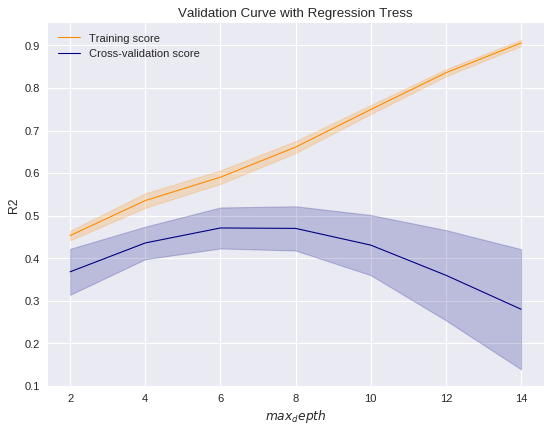

In [0]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Validation Curve with Regression Tress")
plt.xlabel(r"$max_depth$")
plt.ylabel("R2")
#plt.ylim(0.0, 1.0)
lw = 1
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [0]:
# Check the feature importance matrix...
print(X.columns,estimators[2].fit(X,y).feature_importances_)

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object') [0.09398777 0.07126933 0.09276096 0.1029367  0.07362643 0.56541882]


In [0]:
# Setup the grid to search for the optimal set of hyperparameters
tuned_parameters = [{'max_depth': [2,4,6,8,12], 'min_samples_leaf': [1,10,50,100]}]


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

print("# Tuning hyper-parameters for %s" % 'r2')
print()

clf = GridSearchCV(estimators[2], tuned_parameters, cv=5,
                   scoring='%s' % 'r2')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'max_depth': 12, 'min_samples_leaf': 50}

Grid scores on development set:

0.446 (+/-0.031) for {'max_depth': 2, 'min_samples_leaf': 1}
0.446 (+/-0.031) for {'max_depth': 2, 'min_samples_leaf': 10}
0.446 (+/-0.031) for {'max_depth': 2, 'min_samples_leaf': 50}
0.446 (+/-0.031) for {'max_depth': 2, 'min_samples_leaf': 100}
0.526 (+/-0.032) for {'max_depth': 4, 'min_samples_leaf': 1}
0.527 (+/-0.032) for {'max_depth': 4, 'min_samples_leaf': 10}
0.529 (+/-0.029) for {'max_depth': 4, 'min_samples_leaf': 50}
0.524 (+/-0.034) for {'max_depth': 4, 'min_samples_leaf': 100}
0.543 (+/-0.028) for {'max_depth': 6, 'min_samples_leaf': 1}
0.550 (+/-0.028) for {'max_depth': 6, 'min_samples_leaf': 10}
0.554 (+/-0.021) for {'max_depth': 6, 'min_samples_leaf': 50}
0.543 (+/-0.025) for {'max_depth': 6, 'min_samples_leaf': 100}
0.526 (+/-0.030) for {'max_depth': 8, 'min_samples_leaf': 1}
0.562 (+/-0.022) for {'max_depth': 8, 

## This is the bias vs. variance tradeoff....
- variance improved by 100% (factor of 2)
- bias degraded by 33% (factor of 1/3)

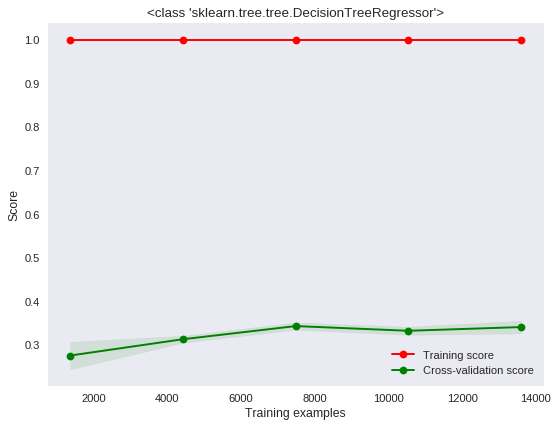

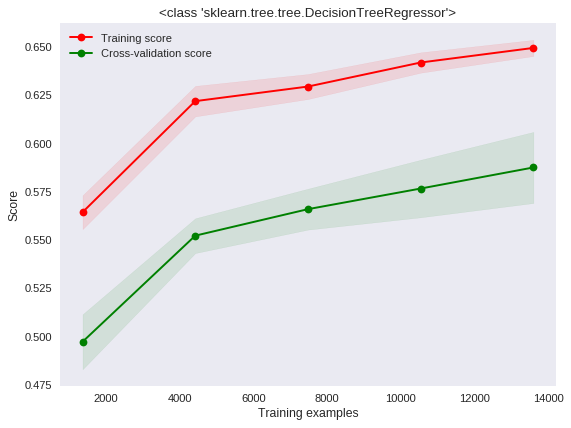

In [0]:
# Quickly take the default parameters for a group of potential regressors
estimators = [DecisionTreeRegressor(), DecisionTreeRegressor(max_depth=12, min_samples_leaf=50)]

# Iterate through the estimators to see how the default parameters do on training and validation
for e in estimators:
  title = str(type(e))
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  plot_learning_curve(e, title, X, y, cv=cv, n_jobs=4)
  plt.show()

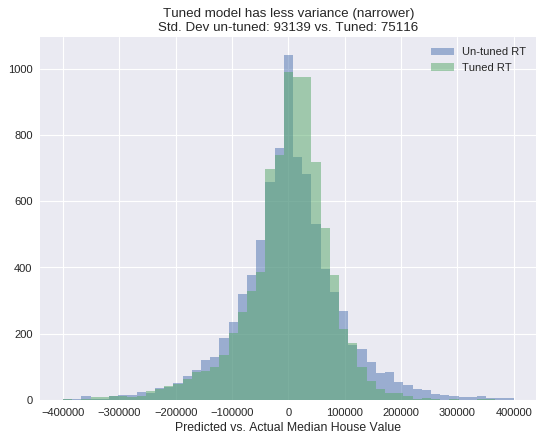

In [0]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

bins = np.linspace(-400000, 400000, 50)
rt=estimators[0].fit(X_train,y_train).predict(X_test)-y_test
trt=estimators[1].fit(X_train,y_train).predict(X_test)-y_test

plt.hist(rt, bins, alpha=0.5, label='Un-tuned RT')
plt.hist(trt, bins, alpha=0.5, label='Tuned RT')
plt.legend(loc='upper right')
plt.xlabel('Predicted vs. Actual Median House Value')
plt.title("Tuned model has less variance (narrower)\nStd. Dev un-tuned: {:4.0f} vs. Tuned: {:4.0f}".format(np.std(rt),np.std(trt)))
plt.show()